# Ein Dataset laden

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Erster Blick auf die Datenstruktur

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
train_images.dtype

dtype('uint8')

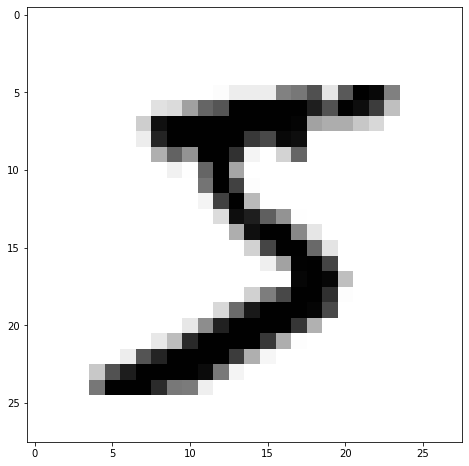

In [8]:
digit = train_images[0]

import matplotlib.pyplot as plt 
plt.figure(figsize=(8,8))
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()


In [9]:
print(train_labels[0])

5


# Die Netzwerk-Architektur


In [10]:
from tensorflow.keras import models 
from tensorflow.keras import layers 

model = models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

In [11]:
 model.compile(optimizer='rmsprop', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Daten vorbereiten

In [12]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Das Training

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4323 - accuracy: 0.8727
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1140 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0667 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0506 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0347 - accuracy: 0.9896


# Vorhersagen machen

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([3.4767658e-07, 4.1497158e-10, 2.3772085e-05, 5.0475827e-04,
       2.0383614e-10, 3.7045996e-07, 1.9450086e-12, 9.9939442e-01,
       3.2775515e-07, 7.5996999e-05], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
test_labels[0]

7

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 575us/step - loss: 0.0734 - accuracy: 0.9775
test_acc: 0.9775000214576721


# Übung

* neue Modelle mit 100 trainingssamples trainieren
* Jeweils train und test accuracy berechnen.

# Übung2

* fashion_mnist ziehen
* shape, ndim, dtype und labels herausfinden
* model trainieren